<a href="https://colab.research.google.com/github/metard/yza-classification-xai/blob/main/Breast_Cancer_Wisconsin_YSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Yıldırım

# Yapay Sinir Ağları Vize Projesi  
### Breast Cancer Wisconsin Veriseti ile MLP Sınıflandırma + Optuna + SHAP
**Hazırlayan:** Selçuk Yıldırım  
**Ders:** Yapay Sinir Ağları (MLP / XAI)  - Gökalp Tulum

**İçerik:**  
- Veri yükleme  
- Veri kalitesi kontrolü  
- EDA  
- Scaling  
- Train/Val/Test bölme  
- 5 MLP model  
- Optuna hiperparametre optimizasyonu  
- SHAP açıklanabilirlik  
- Sonuç değerlendirme  

## 1.Adım: Kütüphanelerin Oluşturulması ve Veri setinin hazırlanması

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Breast Cancer veri setini yükle
data = load_breast_cancer()

# Özellikler ve hedef değişkeni ayır
X = data.data
y = data.target

# Özellikleri ve hedefi DataFrame formatına çevir
df_X = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)

# İlk 5 satırı görüntüle
display(df.head())

# Kısa yorum: Veri seti başarıyla yüklendi, DataFrame'e aktarıldı ve ilk 5 satır incelendi.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2.Adım: Eksik Değer ve Aykırı Değer (Outlier) Analizi, Veri tipi ve Dağılımı Analizi

Eksik değer sayısı (her sütun):
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Eksik değer bulunmamaktadır.

Aykırı değer sayısı (Z-sc

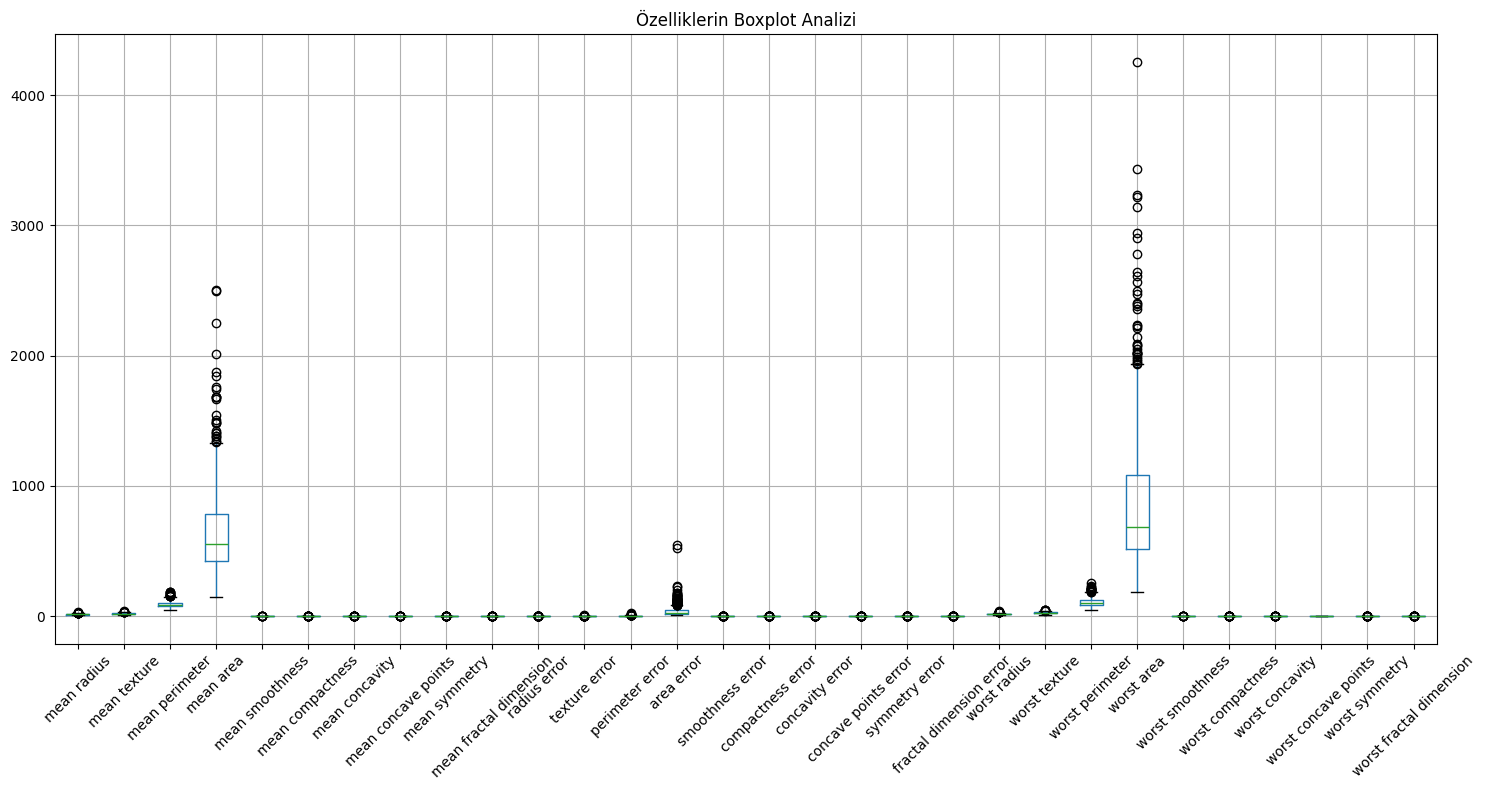


Sayısal değişken sayısı: 31
Kategorik değişken sayısı: 0

Sütunların veri tipi bilgisi:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
w

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri yüklemesi. Varsayım: 'df' zaten mevcut. Eğer yoksa baştan yükleyelim:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)

# 2.1 Eksik Değer Analizi
missing = df.isnull().sum()
print("Eksik değer sayısı (her sütun):\n", missing)

# Eksik değer doldurma örneği (gerekirse):
if missing.sum() > 0:
    # Sayısal değişkenler için ortalama ile doldurma
    df.fillna(df.mean(numeric_only=True), inplace=True)
    print("Eksik değerler ortalama ile dolduruldu.")
else:
    print("Eksik değer bulunmamaktadır.")

# 2.2 Aykırı Değer Analizi (Z-score yöntemi ile)
z_scores = np.abs(stats.zscore(df_X))
outliers = (z_scores > 3).sum(axis=0)
print("\nAykırı değer sayısı (Z-score > 3) (her sütun):\n", pd.Series(outliers, index=df_X.columns))

# Ayrıca tüm sütunlar için boxplot çizimi (görselle inceleme)
plt.figure(figsize=(15, 8))
df_X.boxplot(rot=45)
plt.title('Özelliklerin Boxplot Analizi')
plt.tight_layout()
plt.show()

# 2.3 Veri Tipi ve Dağılım İncelemesi
# Sayısal ve kategorik değişken sayısı
num_vars = df.select_dtypes(include=np.number).shape[1]
cat_vars = df.select_dtypes(exclude=np.number).shape[1]
print(f"\nSayısal değişken sayısı: {num_vars}")
print(f"Kategorik değişken sayısı: {cat_vars}")

# DataFrame sütun tipleri
print("\nSütunların veri tipi bilgisi:")
print(df.dtypes)



# 3.Adım: Keşifsel Veri Analizi (EDA)

İstatistiksel Özellikler (ilk 10 sütun):
                               mean      median         min         max  \
mean radius               14.127292   13.370000    6.981000    28.11000   
mean texture              19.289649   18.840000    9.710000    39.28000   
mean perimeter            91.969033   86.240000   43.790000   188.50000   
mean area                654.889104  551.100000  143.500000  2501.00000   
mean smoothness            0.096360    0.095870    0.052630     0.16340   
mean compactness           0.104341    0.092630    0.019380     0.34540   
mean concavity             0.088799    0.061540    0.000000     0.42680   
mean concave points        0.048919    0.033500    0.000000     0.20120   
mean symmetry              0.181162    0.179200    0.106000     0.30400   
mean fractal dimension     0.062798    0.061540    0.049960     0.09744   
radius error               0.405172    0.324200    0.111500     2.87300   
texture error              1.216853    1.108000    0.360200

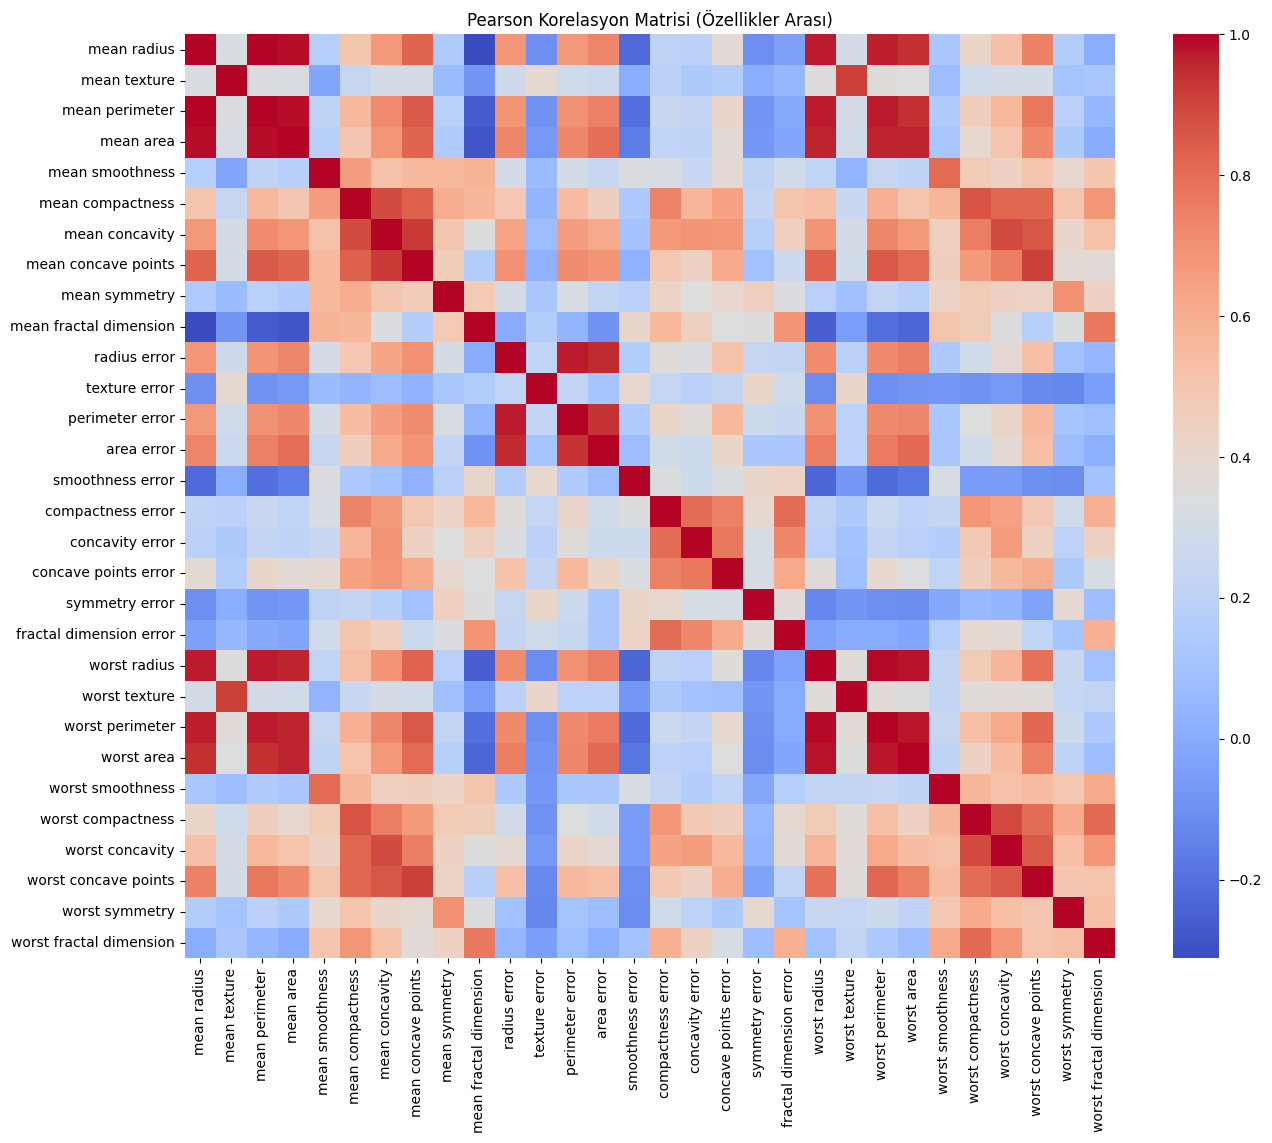


En yüksek korelasyonlu 3 sütun çifti ve korelasyonları:
mean perimeter & mean radius: 0.998
worst perimeter & worst radius: 0.994
mean area & mean radius: 0.987


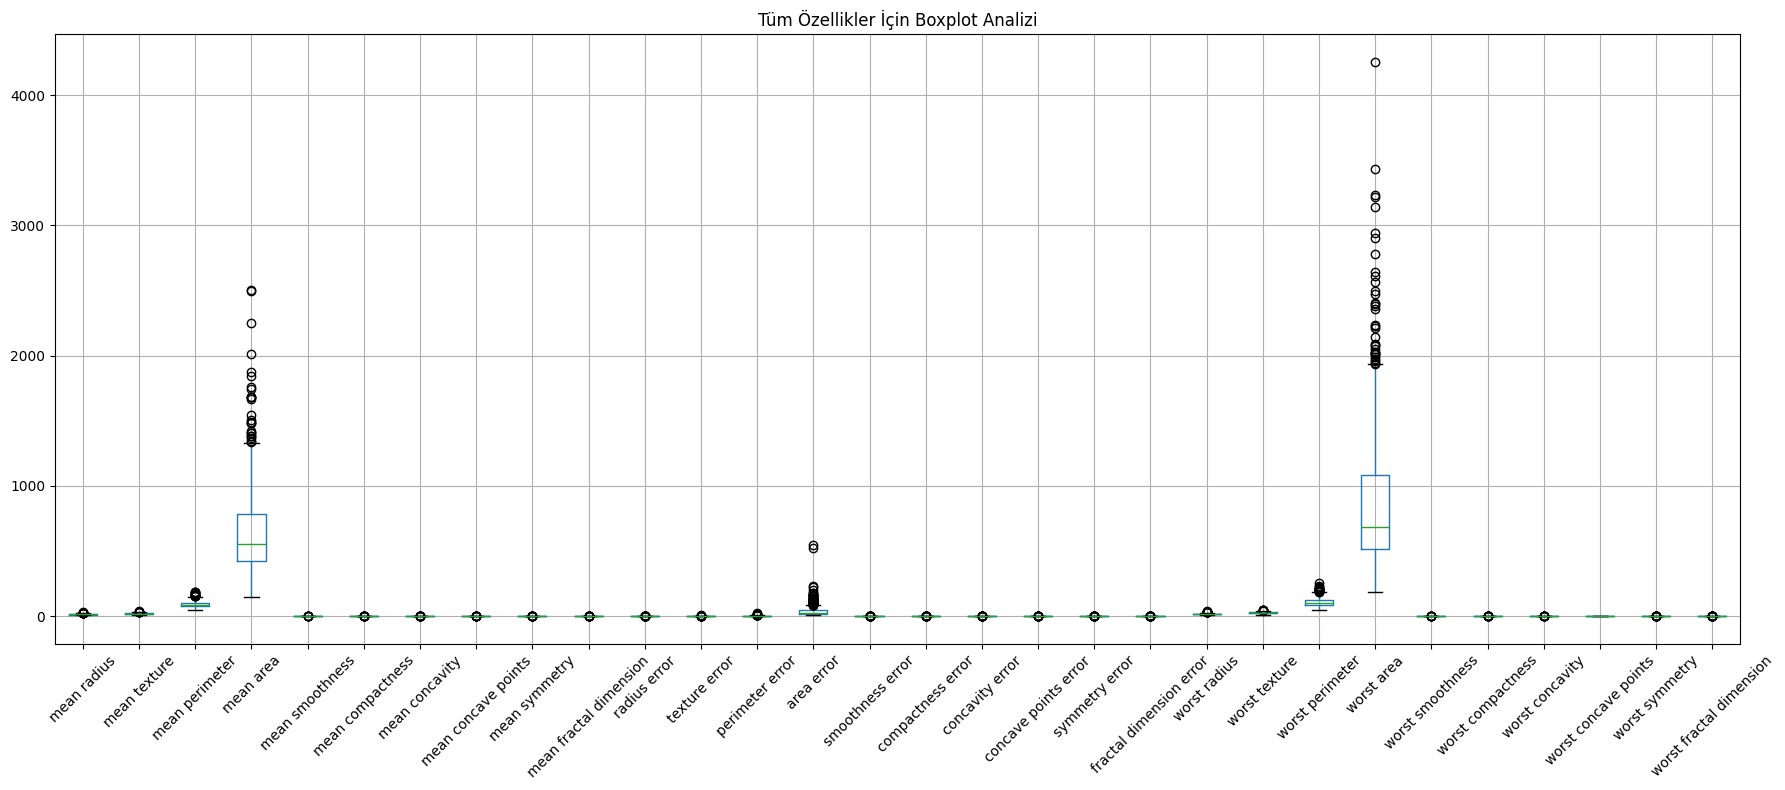

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Veri 'df' adıyla yüklenmiş olmalı, yoksa baştan çekiyoruz
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)

# 3.1 İstatistiksel Özellikler (describe + ek kolonlar)
desc = df_X.describe().T  # mean, std, min, 25%, 50%, 75%, max
desc['median'] = df_X.median()
desc['Q1'] = desc['25%']
desc['Q3'] = desc['75%']
desc = desc[['mean', 'median', 'min', 'max', 'std', 'Q1', 'Q3']]
print("İstatistiksel Özellikler (tüm sütunlar):")
print(desc)

# 3.2 Korelasyon Matrisi & Heatmap
corr = df_X.corr(method='pearson')
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Pearson Korelasyon Matrisi (Özellikler Arası)")
plt.show()

# En yüksek korelasyonlu 3 çift sütunu bulalım (mutlak değeriyle, diagonal hariç)
# Kendisiyle ve tekrar edenlerle birlikte, üst üçgen bakıyoruz
corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr_unstack = corr_pairs.unstack().dropna().abs().sort_values(ascending=False)
top3 = corr_unstack.head(3)
print("\nEn yüksek korelasyonlu 3 sütun çifti ve korelasyonları:")
for (col1, col2), value in top3.items():
    print(f"{col1} & {col2}: {value:.3f}")

# 3.3 Boxplot Analizi
plt.figure(figsize=(18,8))
df_X.boxplot(rot=45)
plt.title("Tüm Özellikler İçin Boxplot Analizi")
plt.tight_layout()
plt.show()




# 4.Adım: Veri Ölçeklendirme (Scalling)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_X) # x_scaled olarak veriyi sakla

print(X_scaled[:5]) # ölçeklendirilmiş verinin ilk 5 satırı

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

# 5.Adım: Veri Setinin Bölünmesi

In [ ]:
from sklearn.model_selection import train_test_split

# df tekrar tanımlanıt
y = df['target']

# 1. Test setini ayır (.20)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)

# 2. Kalan %80'den validation'ı ayır: 0.10/(1-0.20) = 0.125 (%12.5)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)

print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (398, 30)
Validation set: (57, 30)
Test set: (114, 30)


# 6.Adım: Farklı MLP Modellerinin Kurulması

In [15]:
from sklearn.neural_network import MLPClassifier

# 5 farklı model parametresi
mlp_params = [
    {"name": "Basit", "hidden_layer_sizes": (16,),        "activation": "relu", "learning_rate_init": 0.001},
    {"name": "Orta",  "hidden_layer_sizes": (32, 16),     "activation": "relu", "learning_rate_init": 0.005},
    {"name": "Geniş", "hidden_layer_sizes": (64, 64),     "activation": "tanh", "learning_rate_init": 0.001},
    {"name": "Derin", "hidden_layer_sizes": (128, 64, 32),"activation": "relu", "learning_rate_init": 0.0005},
    {"name": "Düşük LR", "hidden_layer_sizes": (32,),     "activation": "relu", "learning_rate_init": 0.0001},
]

# Her bir model için MLPClassifier nesneleri oluştur
mlp_models = []
for params in mlp_params:
    mlp = MLPClassifier(
        hidden_layer_sizes=params["hidden_layer_sizes"],
        activation=params["activation"],
        learning_rate_init=params["learning_rate_init"],
        max_iter=500,
        random_state=42
    )
    mlp_models.append(mlp)
    print(f"{params['name']} model kuruldu: {params}")



Basit model kuruldu: {'name': 'Basit', 'hidden_layer_sizes': (16,), 'activation': 'relu', 'learning_rate_init': 0.001}
Orta model kuruldu: {'name': 'Orta', 'hidden_layer_sizes': (32, 16), 'activation': 'relu', 'learning_rate_init': 0.005}
Geniş model kuruldu: {'name': 'Geniş', 'hidden_layer_sizes': (64, 64), 'activation': 'tanh', 'learning_rate_init': 0.001}
Derin model kuruldu: {'name': 'Derin', 'hidden_layer_sizes': (128, 64, 32), 'activation': 'relu', 'learning_rate_init': 0.0005}
Düşük LR model kuruldu: {'name': 'Düşük LR', 'hidden_layer_sizes': (32,), 'activation': 'relu', 'learning_rate_init': 0.0001}


# 7.Adım: Validation Performanslarının Ölçülmesi

In [16]:
# --- 1. KÜTÜPHANELER --- #
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- 2. VERİYİ ÇEKME ve HAZIRLAMA --- #
data = load_breast_cancer()
X = data.data
y = data.target

# -- 3. ÖZELLİK ÖLÇEKLENDİRME -- #
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Önemli!

# -- 4. TRAIN/VAL/TEST AYIRIMI -- #
# Önce test ayrılır (%20), sonra kalan %80'in %12.5'i validation'a
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)

# -- 5. Farklı MLP Model Tanımları -- #
mlp_params = [
    {"name": "Basit", "hidden_layer_sizes": (16,),        "activation": "relu", "learning_rate_init": 0.001},
    {"name": "Orta",  "hidden_layer_sizes": (32, 16),     "activation": "relu", "learning_rate_init": 0.005},
    {"name": "Geniş", "hidden_layer_sizes": (64, 64),     "activation": "tanh", "learning_rate_init": 0.001},
    {"name": "Derin", "hidden_layer_sizes": (128, 64, 32),"activation": "relu", "learning_rate_init": 0.0005},
    {"name": "Düşük LR", "hidden_layer_sizes": (32,),     "activation": "relu", "learning_rate_init": 0.0001},
]
mlp_models = []
for params in mlp_params:
    mlp = MLPClassifier(
        hidden_layer_sizes=params["hidden_layer_sizes"],
        activation=params["activation"],
        learning_rate_init=params["learning_rate_init"],
        max_iter=500,
        random_state=42
    )
    mlp_models.append(mlp)

# -- 6. 7. ADIM: Validation Sonuçları Tablosu -- #
validation_results = []

for model, params in zip(mlp_models, mlp_params):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    rocauc = roc_auc_score(y_val, y_val_proba)

    validation_results.append({
        'Model': params['name'],
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': rocauc
    })

results_df = pd.DataFrame(validation_results)
results_df = results_df.set_index("Model")
display(results_df.style.format(precision=3).background_gradient(cmap='Blues'))

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Basit,0.965,0.947,1.000,0.973,0.993
Orta,0.965,0.972,0.972,0.972,0.993
Geniş,0.947,0.946,0.972,0.959,0.995
Derin,0.965,0.947,1.000,0.973,0.989
Düşük LR,0.947,0.946,0.972,0.959,0.992


# 8.Adım En İyi MLP Modelinin Test Üzerinden Değerlendirilmesi

Validation setinde en iyi model: Geniş

Test Seti Performans Metrikleri:
Accuracy    : 0.965
Precision   : 0.972
Recall      : 0.972
F1-score    : 0.972
ROC-AUC     : 0.994


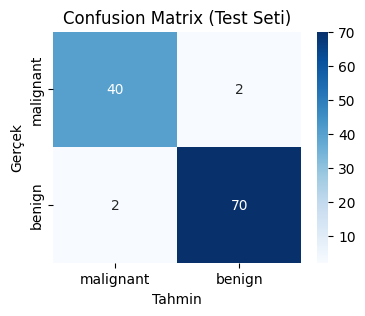

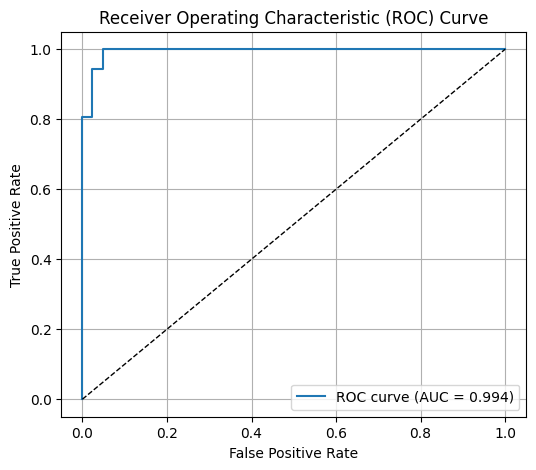

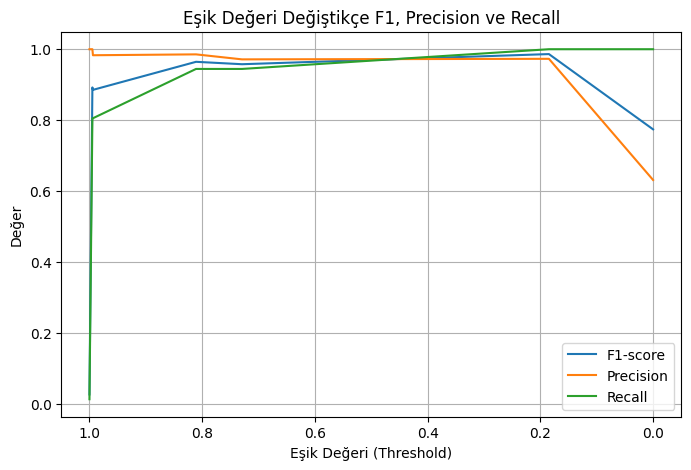

In [17]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# --- 8.1 EN İYİ MODELİN SEÇİMİ --- #
# "validation_results" listesinden en yüksek ROC-AUC'ya sahip modeli seçelim
results_df = pd.DataFrame(validation_results)  # Eğer hâlâ tanımlı değilse
best_idx = results_df['ROC-AUC'].idxmax()
en_iyi_model = mlp_models[best_idx]
en_iyi_model_name = mlp_params[best_idx]['name']
print(f"Validation setinde en iyi model: {en_iyi_model_name}")

# --- 8.1 TEST SETİ PERFORMANS METRİKLERİ --- #
y_test_pred = en_iyi_model.predict(X_test)
y_test_proba = en_iyi_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
rocauc = roc_auc_score(y_test, y_test_proba)

print("\nTest Seti Performans Metrikleri:")
print(f"Accuracy    : {acc:.3f}")
print(f"Precision   : {prec:.3f}")
print(f"Recall      : {rec:.3f}")
print(f"F1-score    : {f1:.3f}")
print(f"ROC-AUC     : {rocauc:.3f}")

# --- 8.2 CONFUSION MATRIX --- #
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix (Test Seti)")
plt.show()

# --- 8.3 ROC CURVE --- #
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {rocauc:.3f})')
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# ROC eğrisine karşılık bazı örnek eşik değerlerinde (threshold) performans değişimini inceleyelim
# Eşik değerinin F1-score ve precision-recall gibi metriklere etkisini görelim
f1_scores = []
precisions = []
recalls = []
for thr in thresholds:
    preds = (y_test_proba >= thr).astype(int)
    f1_scores.append(f1_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))

plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel("Eşik Değeri (Threshold)")
plt.ylabel("Değer")
plt.title("Eşik Değeri Değiştikçe F1, Precision ve Recall")
plt.legend()
plt.gca().invert_xaxis()  # ROC'taki thresholds azalarak gider
plt.grid()
plt.show()



# 9.Adım: Optuna ile Hiperparametre Optimizasyonu (150 Deneme)

In [2]:
# Optuna kurulumu
!pip install optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.4 MB/s eta 0:00:00


In [ ]:


import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

# 9.1 Optuna Objective (validation F1-score optimize ediyoruz)
def objective(trial):
    # Hiperparametrelerin Optuna ile seçilmesi
    hidden_layer_sizes = (
        trial.suggest_int("hidden1", 16, 256),
        trial.suggest_int("hidden2", 8, 128)
    )
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
    alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        batch_size=batch_size,
        max_iter=300,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=10,
        verbose=False
    )
    # Modeli eğit ve F1-score geri döndür
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    score = f1_score(y_val, y_val_pred)
    return score

# 9.1 Study Tanımı
study = optuna.create_study(
    direction="maximize",
    study_name="MLP Hiperparametre Optimizasyonu"
)

# 9.3 Optimizasyonu çalıştır (150 deneme)
study.optimize(objective, n_trials=150, show_progress_bar=True)

# 9.4 En iyi trial ve metrikleri raporlayalım
print("\nEn iyi trial parametreleri:")
print(study.best_trial.params)

# En iyi modeli oluşturup validation performansına bakalım
best_params = study.best_trial.params
best_hidden = (best_params['hidden1'], best_params['hidden2'])  # tuple dönüştür!
best_model = MLPClassifier(
    hidden_layer_sizes=best_hidden,
    activation=best_params['activation'],
    solver=best_params['solver'],
    alpha=best_params['alpha'],
    learning_rate_init=best_params['learning_rate_init'],
    batch_size=best_params['batch_size'],
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
    verbose=False
)

# Eğit
best_model.fit(X_train, y_train)
y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)[:, 1]

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec  = recall_score(y_val, y_val_pred)
f1   = f1_score(y_val, y_val_pred)
roc  = roc_auc_score(y_val, y_val_prob)

print("\nValidation skorları (Best Trial):")
print(f"Accuracy   : {acc:.3f}")
print(f"Precision  : {prec:.3f}")
print(f"Recall     : {rec:.3f}")
print(f"F1-Score   : {f1:.3f}")
print(f"ROC-AUC    : {roc:.3f}")

# 10 Adım: XAI – SHAP Açıklanabilirlik Analizi
## 10.1 En İyi MLP Model Validasyon Başarısına Göre XAI-SHAP Analizi

In [10]:
!pip install shap --quiet
import shap
import matplotlib.pyplot as plt
import numpy as np

# SHAP uyarılarını engelle
import warnings; warnings.filterwarnings("ignore")

  0%|          | 0/57 [00:00<?, ?it/s]

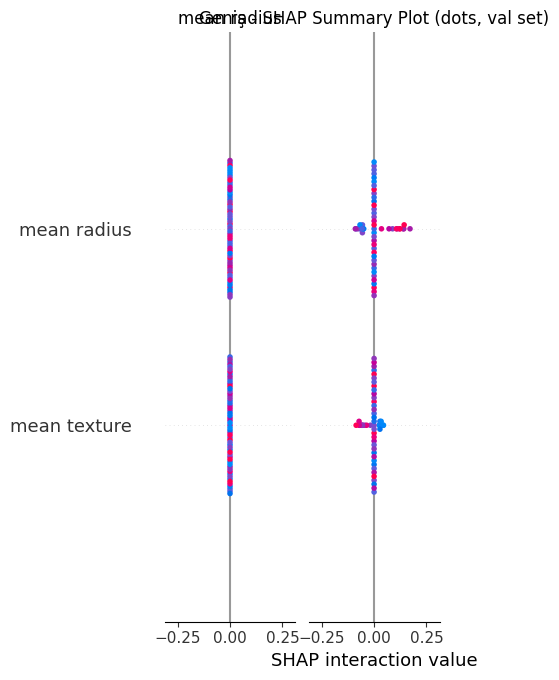

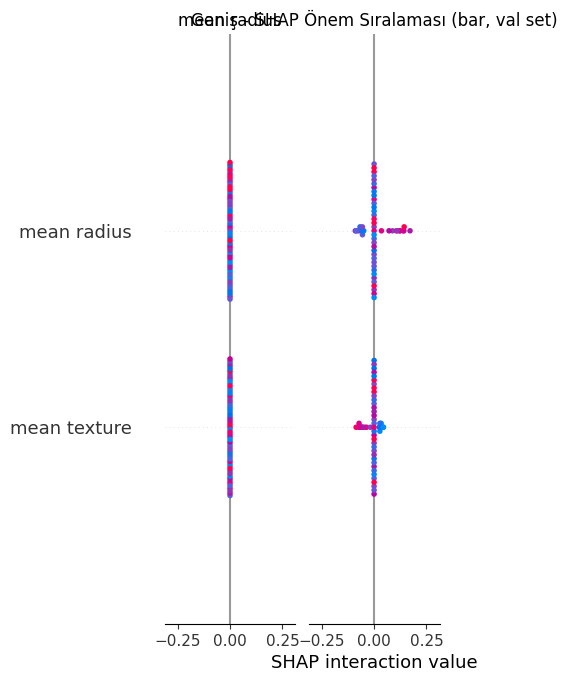

In [29]:
# En iyi MLP modelini zaten seçip oluşturmuştuk:
# (bkz: en_iyi_model ve en_iyi_model_name)

# 1. SHAP Explainer oluştur
explainer = shap.KernelExplainer(en_iyi_model.predict_proba, shap.kmeans(X_train, 10))  # background_data
# (alternatif: sample bir subset de verilebilir, MLP için KernelExplainer uygundur)

# 2. SHAP değerlerinin hesaplanması (örnekleme ile hızlandırıyoruz)
X_val_sample = shap.sample(X_val, 100)
shap_values = explainer.shap_values(X_val_sample)


if isinstance(shap_values, list):
    # Çoklu sınıf (nadiren bu olur) -> pozitif sınıfı kullan
    shap_vals_to_plot = shap_values[1]
else:
    # Tek output (binary) modeli -> direk arrayi kullan
    shap_vals_to_plot = shap_values

shap.summary_plot(shap_vals_to_plot, X_val_sample, feature_names=data.feature_names, show=False)
plt.title(f"{en_iyi_model_name} - SHAP Summary Plot (dots, val set)")
plt.show()

shap.summary_plot(shap_vals_to_plot, X_val_sample, plot_type="bar", feature_names=data.feature_names, show=False)
plt.title(f"{en_iyi_model_name} - SHAP Önem Sıralaması (bar, val set)")
plt.show()

## 10.2 Optuna Optimizasyonu Sonucuna Göre XAI-SHAP Analizi

Optuna en iyi model yüklendi!


  0%|          | 0/57 [00:00<?, ?it/s]

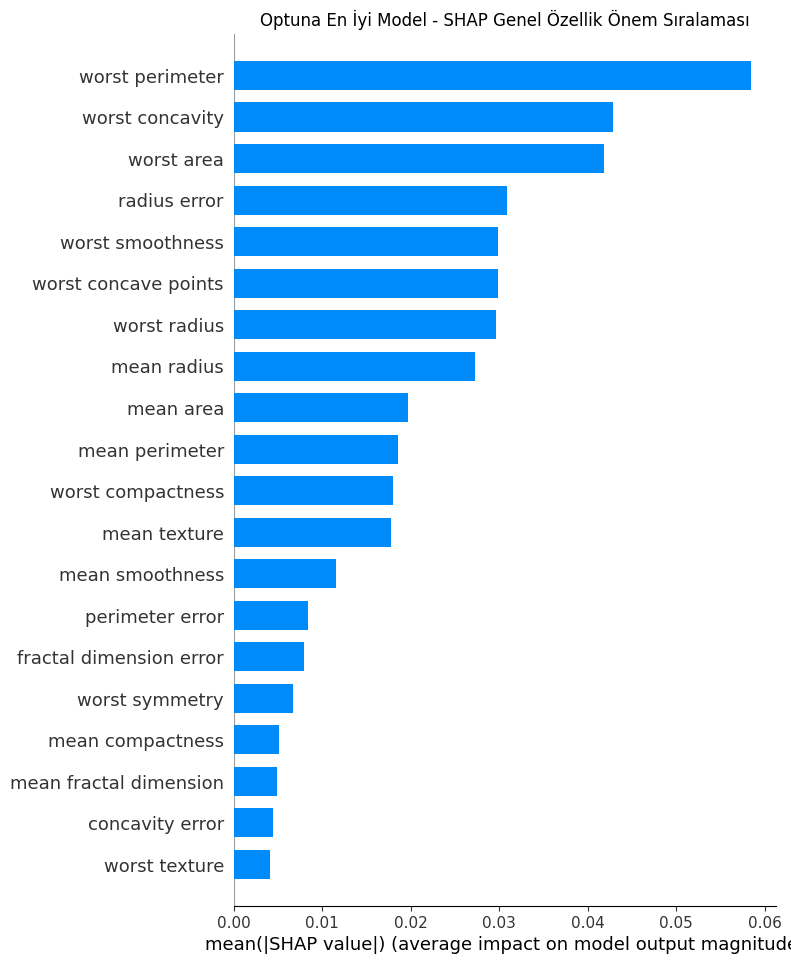

En yüksek SHAP katkısına sahip örnek (28) için force plot 'shap_force_plot_best_sample.html' olarak kaydedildi.
force_plot Colab'de direkt görüntülenmiyorsa .html dosyasını indirip tarayıcıda açabilirsin.

--- Decision Plot (En yüksek katkıya sahip örnek 28 vurgulanmış) ---


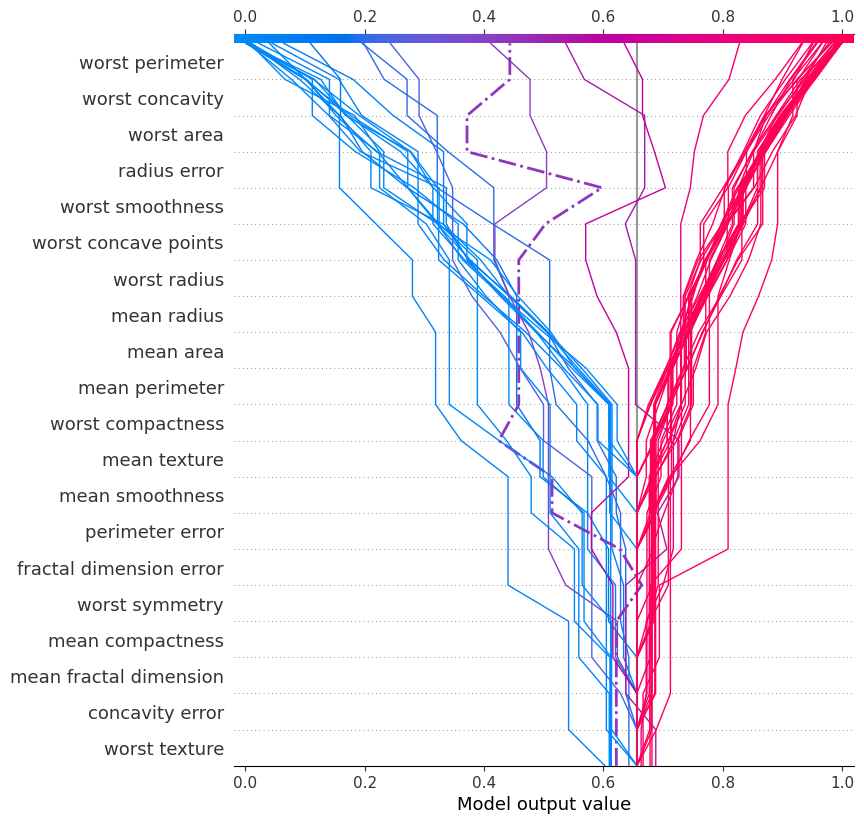

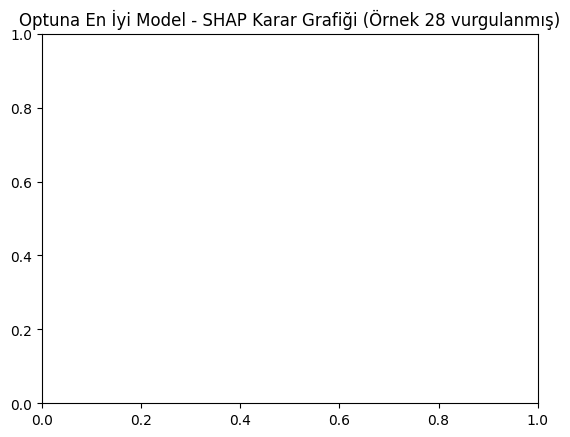

In [25]:
!pip install shap --quiet
import shap
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------------
# 1. Optuna ile bulunan en iyi modeli SHAP için atayalım
#    'best_model' değişkeninin 9. adımda tanımlandığını varsayıyoruz.
# ----------------------------------------
print("Optuna en iyi model yüklendi!")

# ----------------------------------------
# 2. Background Data
# ----------------------------------------
# X_train'in zaten tanımlı olduğunu varsayıyoruz (5. adımdan geliyor)
background = shap.kmeans(X_train, 10)

# ----------------------------------------
# 3. SHAP Explainer
# ----------------------------------------
explainer_optuna = shap.KernelExplainer(best_model.predict_proba, background)

# ----------------------------------------
# 4. 100 örneklik validation sample
#    X_val'ın zaten tanımlı olduğunu varsayıyoruz (5. adımdan geliyor)
# ----------------------------------------
X_val_sample = shap.sample(X_val, 100)

# SHAP değerlerinin hesaplanması
# (Bu işlem biraz zaman alabilir)
shap_values_optuna = explainer_optuna.shap_values(X_val_sample)

# ----------------------------------------------------------
# Binary sınıflandırma için pozitif sınıf (index 1) SHAP değerlerini alıyoruz
# ----------------------------------------------------------
shap_vals_positive_class = shap_values_optuna[:, :, 1]
expected_value_positive_class = explainer_optuna.expected_value[1]



# 1) SUMMARY PLOT (BAR): Genel özellik önem sıralaması
shap.summary_plot(
    shap_vals_positive_class,
    X_val_sample,
    feature_names=data.feature_names,
    plot_type="bar",
    show=False
)
plt.title("Optuna En İyi Model - SHAP Genel Özellik Önem Sıralaması")
plt.show()

# 2) FORCE PLOT (Tek örnek için detaylı açıklama)
# En yüksek SHAP katkısına sahip örneği bulalım ve onu force plot için kullanalım
max_shap_idx = np.argmax(np.max(np.abs(shap_vals_positive_class), axis=1))

shap.initjs()
force_fig = shap.force_plot(
    base_value=expected_value_positive_class,
    shap_values=shap_vals_positive_class[max_shap_idx],
    features=X_val_sample[max_shap_idx],
    feature_names=data.feature_names
)
shap.save_html("shap_force_plot_best_sample.html", force_fig)
print(f"En yüksek SHAP katkısına sahip örnek ({max_shap_idx}) için force plot 'shap_force_plot_best_sample.html' olarak kaydedildi.")


# 3) DECISION PLOT (En yüksek SHAP katkısına sahip örneği vurgulayarak)
# Örnek indeksi yukarıdaki max_shap_idx olarak belirlendi
print(f"\n--- Decision Plot (En yüksek katkıya sahip örnek {max_shap_idx} vurgulanmış) ---")
shap.decision_plot(
    expected_value_positive_class,
    shap_vals_positive_class,
    X_val_sample,
    feature_names=data.feature_names,
    highlight=max_shap_idx
)
plt.title(f"Optuna En İyi Model - SHAP Karar Grafiği (Örnek {max_shap_idx} vurgulanmış)")
plt.show()